In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# columns with mixed types in both train and test sets
train_mixed_cols = [16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51]
test_mixed_cols = [14,15,16,17,18,19,20,22,23,24,25,49,50,51]

mixed_cols_train = train_df.iloc[:,train_mixed_cols].columns
mixed_cols_test = test_df.iloc[:,test_mixed_cols].columns

print("Mixed data type columns in the training set : ", mixed_cols_train)
print("Mixed data type columns in the test set : ", mixed_cols_test)

Mixed data type columns in the training set :  Index(['issue.15', 'issue.16', 'issue.17', 'issue.18', 'issue.19', 'issue.20',
       'issue.21', 'issue.22', 'issue.23', 'issue.24', 'issue.25', 'issue.26',
       'parties.2', 'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')
Mixed data type columns in the test set :  Index(['issue.13', 'issue.14', 'issue.15', 'issue.16', 'issue.17', 'issue.18',
       'issue.19', 'issue.20', 'issue.21', 'issue.22', 'issue.23',
       'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')


In [12]:
train_df.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,...,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,...,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4


In [13]:
test_df.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,1194/04,MS WORD,mk,North Macedonia,NaN,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,53865/11,MS WORD,ua,Ukraine,NaN,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
2,43838/07,MS WORD,ie,Ireland,NaN,CASE OF O. v. IRELAND,COMMITTEE,ECLI:CE:ECHR:2012:0119JUD004383807,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
3,11157/04,MS WORD,ru,Russian Federation,NaN,CASE OF ANCHUGOV AND GLADKOV v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2013:0704JUD001115704,NaN,"Articles 32-33,134 and 135 of the Constitution",...,0,0,0,0,0,0,0,0,0,0
4,42443/02,MS WORD,ru,Russian Federation,NaN,CASE OF EMINBEYLI v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0226JUD004244302,NaN,"Articles 1, 11, 89, 96 and 122 of the Code of ...",...,1,0,0,0,0,0,0,0,0,0


In [14]:
print("The shape of the training dataset : {}".format(train_df.shape))
print("The shape of the test dataset : {}".format(test_df.shape))

The shape of the training dataset : (8878, 328)
The shape of the test dataset : (4760, 327)


Text(0, 0.5, '% of null values in the training set')

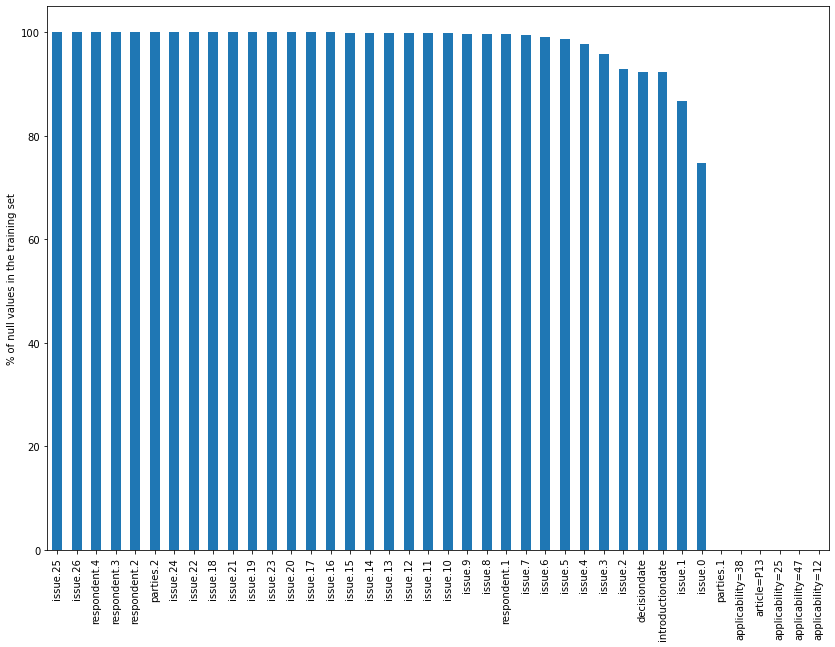

In [15]:
train_null_cols = train_df.isnull().sum().sort_values(ascending=False)/len(train_df)*100
train_null_cols[:40].plot(kind='bar', figsize=(14,10))
plt.ylabel("% of null values in the training set")

Text(0, 0.5, '% of null values in the training set')

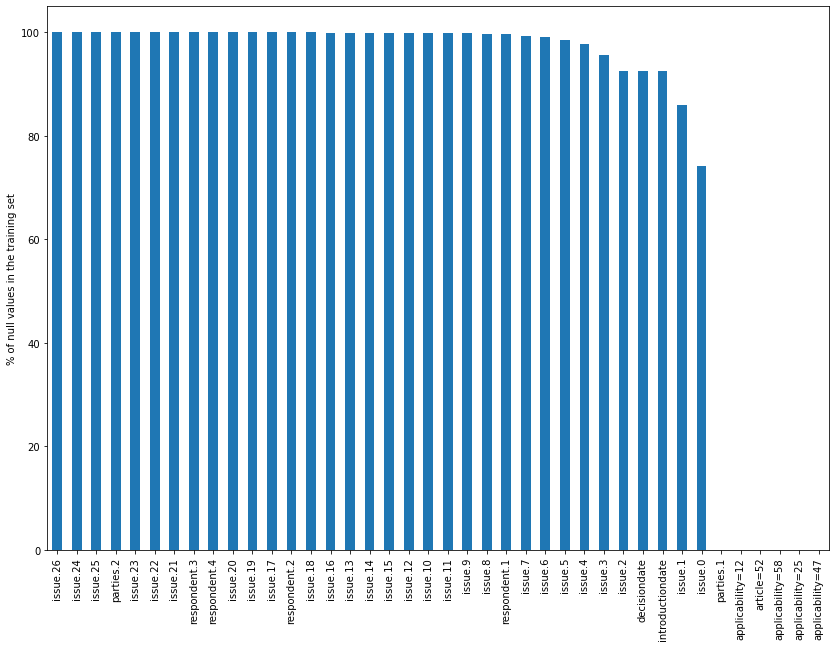

In [16]:
test_null_cols = test_df.isnull().sum().sort_values(ascending=False)/len(test_df)*100
test_null_cols[:40].plot(kind='bar', figsize=(14,10))
plt.ylabel("% of null values in the training set")

In [17]:
# store the columns with >60% values as NULL
train_null_arr = np.array(train_null_cols[:34].index)
test_null_arr = np.array(test_null_cols[:34].index)

In [18]:
# check whether these NULL columns are same in number in both the cases
len(train_null_arr), len(test_null_arr)

(34, 34)

In [19]:
# Are these columns same in both the cases. if yes, then we should get back a null set below
set(train_null_arr).difference(test_null_arr)

set()

In [20]:
# drop these columns
train_df.drop(train_null_arr,axis=1,inplace=True)
test_df.drop(test_null_arr,axis=1,inplace=True)

In [21]:
print("The shape of the training dataset after dropping null columns : {}".format(train_df.shape))
print("The shape of the test dataset after dropping null columns : {}".format(test_df.shape))

The shape of the training dataset after dropping null columns : (8878, 294)
The shape of the test dataset after dropping null columns : (4760, 293)


In [22]:
# how many columns have only one unique value?
cols_with_one_val_train = np.array(train_df.nunique()[train_df.nunique()==1].index)
cols_with_one_val_test = np.array(test_df.nunique()[test_df.nunique()==1].index)

In [23]:
len(cols_with_one_val_test), len(cols_with_one_val_train)

(46, 23)

In [24]:
cols_with_one_val_train

array(['application', 'languageisocode', 'originatingbody_type',
       'documentcollectionid=CASELAW', 'documentcollectionid=JUDGMENTS',
       'documentcollectionid=ENG', 'applicability=51', 'applicability=7',
       'applicability=28', 'applicability=29', 'applicability=31',
       'applicability=19', 'applicability=40', 'applicability=34',
       'applicability=27', 'applicability=64', 'applicability=4',
       'applicability=77', 'paragraphs=7-2', 'paragraphs=28-3',
       'paragraphs=27-1-b', 'paragraphs=32-2', 'paragraphs=46-4'],
      dtype=object)

In [25]:
cols_with_one_val_test

array(['application', 'languageisocode', 'originatingbody_type',
       'article=33', 'article=52', 'article=P13',
       'documentcollectionid=CASELAW', 'documentcollectionid=JUDGMENTS',
       'documentcollectionid=ENG', 'applicability=22', 'applicability=15',
       'applicability=50', 'applicability=6', 'applicability=81',
       'applicability=66', 'applicability=49', 'applicability=63',
       'applicability=68', 'applicability=46', 'applicability=35',
       'applicability=54', 'applicability=16', 'applicability=57',
       'applicability=2', 'applicability=67', 'applicability=71',
       'applicability=59', 'paragraphs=27-2', 'paragraphs=35-2',
       'paragraphs=P1-4', 'paragraphs=56-1', 'paragraphs=P7-1-2',
       'paragraphs=15-3', 'paragraphs=33', 'paragraphs=28-1-a',
       'paragraphs=4-3', 'paragraphs=52', 'paragraphs=P13-1',
       'paragraphs=P7-4-1', 'paragraphs=P4-3', 'paragraphs=29-1',
       'paragraphs=28-1', 'paragraphs=P6-2', 'ccl_article=17',
       'ccl_articl

In [26]:
# Are these columns common in both the sets?
set(cols_with_one_val_test).intersection(cols_with_one_val_train)

{'application',
 'documentcollectionid=CASELAW',
 'documentcollectionid=ENG',
 'documentcollectionid=JUDGMENTS',
 'languageisocode',
 'originatingbody_type'}

In [27]:
# drop the columns with only one unique values in both the datasets
cols_with_one_val = list(set(cols_with_one_val_test).intersection(cols_with_one_val_train))
train_df.drop(cols_with_one_val, axis=1, inplace=True)
test_df.drop(cols_with_one_val, axis=1, inplace=True)

In [28]:
# columns that have one unique val in training set but not in test set -> needs special attention
one_val_train = ['applicability=51', 'applicability=7','applicability=28', 'applicability=29', 'applicability=31',
                 'applicability=19', 'applicability=40', 'applicability=34','applicability=27', 'applicability=64', 
                 'applicability=4','applicability=77', 'paragraphs=7-2', 'paragraphs=28-3','paragraphs=27-1-b', 
                 'paragraphs=32-2', 'paragraphs=46-4']

for col in one_val_train:
    print("train set : ", train_df[col].unique())
    print("test set : ", test_df[col].unique())
    print("-------------------------------")

train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
---------------------------

In [47]:
# since these columns are constant during training, it is better to remove them from both the datasets. But before
# that let's apply value_counts on these columns in the test set

print("Test set")
for col in one_val_train:
    print("*********************")
    print("col : {}".format(col))
    print(test_df[col].value_counts())
    print("---------------------")

Test set
*********************
col : applicability=51
0    4759
1       1
Name: applicability=51, dtype: int64
---------------------
*********************
col : applicability=7
0    4758
1       2
Name: applicability=7, dtype: int64
---------------------
*********************
col : applicability=28
0    4759
1       1
Name: applicability=28, dtype: int64
---------------------
*********************
col : applicability=29
0    4759
1       1
Name: applicability=29, dtype: int64
---------------------
*********************
col : applicability=31
0    4759
1       1
Name: applicability=31, dtype: int64
---------------------
*********************
col : applicability=19
0    4759
1       1
Name: applicability=19, dtype: int64
---------------------
*********************
col : applicability=40
0    4759
1       1
Name: applicability=40, dtype: int64
---------------------
*********************
col : applicability=34
0    4759
1       1
Name: applicability=34, dtype: int64
---------------------
*

In [29]:
# Therefore, it looks like these columns are constant 99% of the time even in the test set and we can safely 
# remove them.
train_df.drop(one_val_train,axis=1,inplace=True)
test_df.drop(one_val_train,axis=1,inplace=True)

In [30]:
# columns that have one unique val in test set but not in training set -> we can keep these columns
one_val_test = ['article=33', 'article=52', 'article=P13', 'applicability=22', 'applicability=15',
                'applicability=50', 'applicability=6', 'applicability=81', 'applicability=66', 'applicability=49',
                'applicability=63', 'applicability=68', 'applicability=46', 'applicability=35','applicability=54', 
                'applicability=16', 'applicability=57', 'applicability=2', 'applicability=67', 'applicability=71',
                'applicability=59', 'paragraphs=27-2', 'paragraphs=35-2', 'paragraphs=P1-4', 'paragraphs=56-1', 
                'paragraphs=P7-1-2', 'paragraphs=15-3', 'paragraphs=33', 'paragraphs=28-1-a', 'paragraphs=4-3',
                'paragraphs=52', 'paragraphs=P13-1', 'paragraphs=P7-4-1', 'paragraphs=P4-3', 'paragraphs=29-1',
                'paragraphs=28-1', 'paragraphs=P6-2', 'ccl_article=17', 'ccl_article=46', 'ccl_article=p12']

for col in one_val_test:
    print("column name : ", col)
    print("train set : ", train_df[col].unique())
    print("test set : ", test_df[col].unique())
    print("-------------------------------")

column name :  article=33
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  article=52
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  article=P13
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=22
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=15
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=50
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=6
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=81
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=66
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=49
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability

In [31]:
# column 'ccl_article=17' has two binary values as -1 and 0. Let's investigate it.
train_df['ccl_article=17'].value_counts(normalize=True)

 0    0.999887
-1    0.000113
Name: ccl_article=17, dtype: float64

In [32]:
test_df['ccl_article=17'].value_counts(normalize=True)

0    1.0
Name: ccl_article=17, dtype: float64

In [33]:
# must be a mistake in entering value in the column 'ccl_article=17'. Let's drop this column as well
train_df.drop('ccl_article=17',axis=1,inplace=True)
test_df.drop('ccl_article=17',axis=1,inplace=True)

In [34]:
# Now let's look at distribution of categories in these columns in the training set
print("Train set")
one_val_test.remove('ccl_article=17')
for col in one_val_test:
    print("*********************")
    print("col : {}".format(col))
    print(train_df[col].value_counts())
    print("---------------------")

Train set
*********************
col : article=33
0    8877
1       1
Name: article=33, dtype: int64
---------------------
*********************
col : article=52
0    8876
1       2
Name: article=52, dtype: int64
---------------------
*********************
col : article=P13
0    8877
1       1
Name: article=P13, dtype: int64
---------------------
*********************
col : applicability=22
0    8877
1       1
Name: applicability=22, dtype: int64
---------------------
*********************
col : applicability=15
0    8877
1       1
Name: applicability=15, dtype: int64
---------------------
*********************
col : applicability=50
0    8876
1       2
Name: applicability=50, dtype: int64
---------------------
*********************
col : applicability=6
0    8876
1       2
Name: applicability=6, dtype: int64
---------------------
*********************
col : applicability=81
0    8877
1       1
Name: applicability=81, dtype: int64
---------------------
*********************
col : applic

In [35]:
# So, as we can see almost all the columns except 'paragraphs=35-2' has not more than 3 entries associated with 
# category=1. Even if the col 'paragraphs=35-2' has a very tiny fraction of category=1. So, we will drop these 
# columns from both the training and test sets as of now.

train_df.drop(one_val_test,axis=1,inplace=True)
test_df.drop(one_val_test,axis=1,inplace=True)

In [36]:
print("The shape of the training set after dropping columns with constant values : {}".format(train_df.shape))
print("The shape of the test set after dropping columns with constant values : {}".format(test_df.shape))

The shape of the training set after dropping columns with constant values : (8878, 231)
The shape of the test set after dropping columns with constant values : (4760, 230)


In [37]:
# check whether there is any duplicate row in both the datasets
print(train_df.duplicated().value_counts())
print("--------------------------")
print(test_df.duplicated().value_counts())

False    8878
dtype: int64
--------------------------
False    4760
dtype: int64


In [38]:
# let's now look at the cols with 'object' type
obj_cols_train = train_df.select_dtypes(include='object')
obj_cols_test = test_df.select_dtypes(include='object')

In [39]:
# are columns with object type are same in both the datsets
print("Train set")
print(list(obj_cols_train.columns))
print("-------------------------------------------------------------------------------------------------------------")
print("Test set")
print(list(obj_cols_test.columns))

Train set
['appno', 'country.alpha2', 'country.name', 'docname', 'doctypebranch', 'ecli', 'itemid', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']
-------------------------------------------------------------------------------------------------------------
Test set
['appno', 'country.alpha2', 'country.name', 'docname', 'doctypebranch', 'ecli', 'itemid', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']


In [40]:
# let's check these columns one by one

**Feature 'appno'**

In [41]:
print("col : appno")
print("Total no. of unique values in the training set : {}".format(train_df['appno'].nunique()))
print("Total no. of unique values in the test set : {}".format(test_df['appno'].nunique()))

col : appno
Total no. of unique values in the training set : 8799
Total no. of unique values in the test set : 4760


In [42]:
# this feature is more likely to be same as that of fetaure like id with different value for each instance and is
# not significant to train on. Let's drop it.
train_df.drop('appno',axis=1,inplace=True)
test_df.drop('appno',axis=1,inplace=True)

**Feature 'country.alpha2'**

In [43]:
print("col : country.alpha2")
print("Total no. of unique values in the training set : {}".format(train_df['country.alpha2'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['country.alpha2'].nunique()))
print("Train set : ",train_df['country.alpha2'].unique(),"\n")
print("Test set : ",test_df['country.alpha2'].unique(),"\n")

col : country.alpha2
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['ru' 'tr' 'si' 'ch' 'gr' 'pl' 'gb' 'hu' 'es' 'ua' 'me' 'cz' 'lt' 'az'
 'md' 'mk' 'ro' 'rs' 'de' 'bg' 'al' 'at' 'hr' 'sk' 'it' 'fi' 'fr' 'se'
 'no' 'is' 'am' 'mt' 'be' 'cy' 'ge' 'pt' 'dk' 'lv' 'ee' 'ba' 'nl' 'ie'
 'li' 'sm' 'lu' 'ad'] 

Test set :  ['mk' 'ua' 'ie' 'ru' 'bg' 'pl' 'gr' 'hu' 'de' 'at' 'hr' 'lt' 'md' 'si'
 'fi' 'tr' 'ro' 'cz' 'dk' 'gb' 'al' 'se' 'nl' 'rs' 'sk' 'is' 'lv' 'cy'
 'ge' 'it' 'ch' 'mt' 'es' 'pt' 'ba' 'ee' 'az' 'am' 'sm' 'no' 'be' 'me'
 'fr' 'lu' 'ad' 'li'] 



In [44]:
# do categories present in both of these files same?
print(set(train_df['country.alpha2'].unique()).difference(test_df['country.alpha2'].unique()))
print(set(test_df['country.alpha2'].unique()).difference(train_df['country.alpha2'].unique()))

set()
set()


In [45]:
# what is the distribution of different categories?
print("Train Set:")
print(train_df['country.alpha2'].value_counts(normalize=True))
print("\n")
print("Test Set:")
print(test_df['country.alpha2'].value_counts(normalize=True))

Train Set:
ru    0.185515
ua    0.105091
tr    0.097770
pl    0.069498
hu    0.041000
ro    0.037734
bg    0.034242
gb    0.033904
hr    0.028723
at    0.026245
sk    0.025569
it    0.025118
md    0.024668
si    0.023541
de    0.022077
fr    0.019374
az    0.015093
lt    0.014643
rs    0.014305
fi    0.013066
mk    0.012390
gr    0.010926
nl    0.010813
am    0.009687
ch    0.008223
mt    0.007885
se    0.007547
lv    0.007434
ge    0.006871
cy    0.006195
pt    0.005745
cz    0.005745
ba    0.005632
be    0.005407
es    0.005294
ee    0.004956
al    0.004731
me    0.004393
no    0.004055
dk    0.002591
ie    0.002365
is    0.001577
lu    0.000788
sm    0.000788
li    0.000676
ad    0.000113
Name: country.alpha2, dtype: float64


Test Set:
ru    0.205462
tr    0.095168
ua    0.090966
pl    0.074370
hu    0.041597
ro    0.039286
gb    0.034034
bg    0.033193
hr    0.028151
md    0.027941
sk    0.025210
at    0.023950
si    0.023109
it    0.020588
de    0.019118
rs    0.017227
lt    0.01

**Feature 'country.name'**

In [46]:
print("col : country.name")
print("Total no. of unique values in the training set : {}".format(train_df['country.name'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['country.name'].nunique()))
print("Train set : ",train_df['country.name'].unique(),"\n")
print("Test set : ",test_df['country.name'].unique(),"\n")

col : country.name
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['Russian Federation' 'Turkey' 'Slovenia' 'Switzerland' 'Greece' 'Poland'
 'United Kingdom' 'Hungary' 'Spain' 'Ukraine' 'Montenegro' 'Czechia'
 'Lithuania' 'Azerbaijan' 'Moldova, Republic of' 'North Macedonia'
 'Romania' 'Serbia' 'Germany' 'Bulgaria' 'Albania' 'Austria' 'Croatia'
 'Slovakia' 'Italy' 'Finland' 'France' 'Sweden' 'Norway' 'Iceland'
 'Armenia' 'Malta' 'Belgium' 'Cyprus' 'Georgia' 'Portugal' 'Denmark'
 'Latvia' 'Estonia' 'Bosnia and Herzegovina' 'Netherlands' 'Ireland'
 'Liechtenstein' 'San Marino' 'Luxembourg' 'Andorra'] 

Test set :  ['North Macedonia' 'Ukraine' 'Ireland' 'Russian Federation' 'Bulgaria'
 'Poland' 'Greece' 'Hungary' 'Germany' 'Austria' 'Croatia' 'Lithuania'
 'Moldova, Republic of' 'Slovenia' 'Finland' 'Turkey' 'Romania' 'Czechia'
 'Denmark' 'United Kingdom' 'Albania' 'Sweden' 'Netherlands' 'Serbia'
 'Slovakia' 'Iceland' 'Lat

In [47]:
# do categories present in both of these files same?
print(set(train_df['country.name'].unique()).difference(test_df['country.name'].unique()))
print(set(test_df['country.name'].unique()).difference(train_df['country.name'].unique()))

set()
set()


In [48]:
# Actually, country.alpha2 and country.name are the same feature. We can drop one of them as of now. Let's drop 
# country.name.
train_df.drop("country.name",axis=1,inplace=True)
test_df.drop("country.name",axis=1,inplace=True)

**Feature 'docname'**

In [49]:
print("col : docname")
print("Total no. of unique values in the training set : {}".format(train_df['docname'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['docname'].nunique()))
print("Train set : ",train_df['docname'].unique(),"\n")
print("Test set : ",test_df['docname'].unique(),"\n")

col : docname
Total no. of unique values in the training set : 8682
Total no. of unique values in the test set : 4727 

Train set :  ['CASE OF KOKOSHKINA v. RUSSIA' 'CASE OF ÖZCAN v. TURKEY'
 'CASE OF DANIJEL PEČNIK v. SLOVENIA' ... 'CASE OF BABUSHKIN v. RUSSIA'
 'CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN' 'CASE OF TUR v. POLAND'] 

Test set :  ['CASE OF CAMINSKI v. "THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"'
 'CASE OF KUSHCH v. UKRAINE' 'CASE OF O. v. IRELAND' ...
 'CASE OF PASCAL v. ROMANIA' 'CASE OF DAOUKOPOULOS v. GREECE'
 'CASE OF VOGLREITER v. AUSTRIA'] 



In [50]:
train_df['docname'].unique()[:5]

array(['CASE OF KOKOSHKINA v. RUSSIA', 'CASE OF ÖZCAN v. TURKEY',
       'CASE OF DANIJEL PEČNIK v. SLOVENIA',
       'CASE OF PALANCI v. SWITZERLAND',
       'CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA'], dtype=object)

In [51]:
train_df[['country.alpha2', 'docname']]

,country.alpha2,docname
0,ru,CASE OF KOKOSHKINA v. RUSSIA
1,tr,CASE OF ÖZCAN v. TURKEY
2,si,CASE OF DANIJEL PEČNIK v. SLOVENIA
3,ch,CASE OF PALANCI v. SWITZERLAND
4,ru,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA
...,...,...
8873,ua,CASE OF RASHITOV AND OTHERS v. UKRAINE
8874,ru,CASE OF URMANOV v. RUSSIA
8875,ru,CASE OF BABUSHKIN v. RUSSIA
8876,es,CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN


In [52]:
# this feature contains two pieces of information - person name and the country name against which he/she filed a 
# case. The country information is already present in the feature country.alpha2 and name of a person is more similar
# to ids. So, we can drop this feature as well.

train_df.drop('docname', axis=1,inplace=True)
test_df.drop('docname', axis=1,inplace=True)

**Feature 'doctypebranch'**

In [53]:
print("col : doctypebranch")
print("Total no. of unique values in the training set : {}".format(train_df['doctypebranch'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['doctypebranch'].nunique()))
print("Train set : ",train_df['doctypebranch'].unique(),"\n")
print("Test set : ",test_df['doctypebranch'].unique(),"\n")

col : doctypebranch
Total no. of unique values in the training set : 3
Total no. of unique values in the test set : 3 

Train set :  ['CHAMBER' 'COMMITTEE' 'GRANDCHAMBER'] 

Test set :  ['COMMITTEE' 'CHAMBER' 'GRANDCHAMBER'] 



**Feature 'ecli'**

In [54]:
print("col : ecli")
print("Total no. of unique values in the training set : {}".format(train_df['ecli'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['ecli'].nunique()))
print("Train set : ",train_df['ecli'].unique(),"\n")
print("Test set : ",test_df['ecli'].unique(),"\n")

col : ecli
Total no. of unique values in the training set : 8878
Total no. of unique values in the test set : 4760 

Train set :  ['ECLI:CE:ECHR:2009:0528JUD000205208' 'ECLI:CE:ECHR:2018:0710JUD000472807'
 'ECLI:CE:ECHR:2012:1018JUD004413506' ...
 'ECLI:CE:ECHR:2007:1018JUD006725301' 'ECLI:CE:ECHR:1997:1219JUD002673795'
 'ECLI:CE:ECHR:2007:1023JUD002169505'] 

Test set :  ['ECLI:CE:ECHR:2011:0224JUD000119404' 'ECLI:CE:ECHR:2015:1203JUD005386511'
 'ECLI:CE:ECHR:2012:0119JUD004383807' ...
 'ECLI:CE:ECHR:2012:0417JUD000080509' 'ECLI:CE:ECHR:2018:0712JUD004471116'
 'ECLI:CE:ECHR:2019:0919JUD002115518'] 



In [55]:
# This feature is basically unique id associated with a case and can be dropped.
train_df.drop('ecli',axis=1,inplace=True)
test_df.drop('ecli',axis=1,inplace=True)

**Feature 'itemid'**

In [56]:
print("col : itemid")
print("Total no. of unique values in the training set : {}".format(train_df['itemid'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['itemid'].nunique()))
print("Train set : ",train_df['itemid'].unique(),"\n")
print("Test set : ",test_df['itemid'].unique(),"\n")

col : itemid
Total no. of unique values in the training set : 8878
Total no. of unique values in the test set : 4760 

Train set :  ['001-92699' '001-184490' '001-113810' ... '001-82818' '001-58127'
 '001-82921'] 

Test set :  ['001-103613' '001-158963' '001-108659' ... '001-110382' '001-184485'
 '001-195866'] 



In [57]:
# again a feature similar to ids and hence dropped.
train_df.drop('itemid',axis=1,inplace=True)
test_df.drop('itemid',axis=1,inplace=True)

**Feature 'judgementdate'**

In [58]:
print("col : judgementdate")
print("Total no. of unique values in the training set : {}".format(train_df['judgementdate'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['judgementdate'].nunique()))
print("Train set : ",train_df['judgementdate'].unique(),"\n")
print("Test set : ",test_df['judgementdate'].unique(),"\n")

col : judgementdate
Total no. of unique values in the training set : 1906
Total no. of unique values in the test set : 1584 

Train set :  ['28/05/2009' '10/07/2018' '18/10/2012' ... '29/10/2013' '04/12/2015'
 '19/12/1997'] 

Test set :  ['24/02/2011' '03/12/2015' '19/01/2012' ... '23/10/1990' '10/03/2009'
 '22/07/1999'] 



In [59]:
# date like feature. We will come back to this later.

**Feature 'kpdate'**

In [60]:
print("col : kpdate")
print("Total no. of unique values in the training set : {}".format(train_df['kpdate'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['kpdate'].nunique()))
print("Train set : ",train_df['kpdate'].unique(),"\n")
print("Test set : ",test_df['kpdate'].unique(),"\n")

col : kpdate
Total no. of unique values in the training set : 1906
Total no. of unique values in the test set : 1584 

Train set :  ['28/05/2009' '10/07/2018' '18/10/2012' ... '29/10/2013' '04/12/2015'
 '19/12/1997'] 

Test set :  ['24/02/2011' '03/12/2015' '19/01/2012' ... '23/10/1990' '10/03/2009'
 '22/07/1999'] 



In [61]:
# looks like features 'judgementdate' and 'kpdate' represent the same thing.
train_df[['judgementdate','kpdate']].head(10)

,judgementdate,kpdate
0,28/05/2009,28/05/2009
1,10/07/2018,10/07/2018
2,18/10/2012,18/10/2012
3,25/03/2014,25/03/2014
4,01/10/2009,01/10/2009
5,11/04/2002,11/04/2002
6,20/06/2006,20/06/2006
7,27/11/2007,27/11/2007
8,01/03/2001,01/03/2001
9,02/12/2008,02/12/2008


In [62]:
test_df[['judgementdate','kpdate']].head(10)

,judgementdate,kpdate
0,24/02/2011,24/02/2011
1,03/12/2015,03/12/2015
2,19/01/2012,19/01/2012
3,04/07/2013,04/07/2013
4,26/02/2009,26/02/2009
5,12/03/2009,12/03/2009
6,27/11/2014,27/11/2014
7,12/02/2009,12/02/2009
8,23/10/2012,23/10/2012
9,13/01/2011,13/01/2011


In [63]:
# So these two are duplicate features and we drop one of them.
train_df.drop('kpdate',axis=1,inplace=True)
test_df.drop('kpdate',axis=1,inplace=True)

**Feature 'originatingbody_name'**

In [64]:
print("col : originatingbody_name")
print("Total no. of unique values in the training set : {}".format(train_df['originatingbody_name'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['originatingbody_name'].nunique()))
print("Train set : ",train_df['originatingbody_name'].unique(),"\n")
print("Test set : ",test_df['originatingbody_name'].unique(),"\n")

col : originatingbody_name
Total no. of unique values in the training set : 13
Total no. of unique values in the test set : 13 

Train set :  ['First Section' 'Second Section Committee' 'Fith Section'
 'Second Section' 'Fourth Section' 'Chamber' 'Fourth Section Committee'
 'Fith Section Committee' 'Third Section Committee' 'Third Section'
 'First Section Committee' 'Grand Chamber' 'Plenary'] 

Test set :  ['Fith Section Committee' 'Fith Section' 'First Section' 'Fourth Section'
 'First Section Committee' 'Fourth Section Committee'
 'Third Section Committee' 'Second Section Committee' 'Third Section'
 'Second Section' 'Grand Chamber' 'Chamber' 'Plenary'] 



In [65]:
# are all categories same in both the datasets?
print(set(train_df['originatingbody_name'].unique()).difference(test_df['originatingbody_name']))
print(set(test_df['originatingbody_name'].unique()).difference(train_df['originatingbody_name']))

set()
set()


**Feature 'parties.0'**

In [66]:
print("col : parties.0")
print("Total no. of unique values in the training set : {}".format(train_df['parties.0'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['parties.0'].nunique()))
print("Train set : ",train_df['parties.0'].unique(),"\n")
print("Test set : ",test_df['parties.0'].unique(),"\n")

col : parties.0
Total no. of unique values in the training set : 8361
Total no. of unique values in the test set : 4624 

Train set :  ['KOKOSHKINA' 'ÖZCAN' 'DANIJEL PEČNIK' ... 'BABUSHKIN'
 'BRUALLA GÓMEZ DE LA TORRE' 'TUR'] 

Test set :  ['CAMINSKI' 'KUSHCH' 'O.' ... 'PASCAL' 'DAOUKOPOULOS' 'VOGLREITER'] 



In [67]:
# if we go back to the dropped feature 'docname', we can associate the feature 'parties.0'  most likely to represent the name
# of person filing the case. Since, we have dropped this info earlier, we will drop it this time also.

train_df.drop('parties.0',axis=1,inplace=True)
test_df.drop('parties.0',axis=1,inplace=True)

**Feature 'parties.1'**

In [68]:
print("col : parties.1")
print("Total no. of unique values in the training set : {}".format(train_df['parties.1'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['parties.1'].nunique()))
print("Train set : ",train_df['parties.1'].unique(),"\n")
print("Test set : ",test_df['parties.1'].unique(),"\n")

col : parties.1
Total no. of unique values in the training set : 93
Total no. of unique values in the test set : 76 

Train set :  ['RUSSIA' 'TURKEY' 'SLOVENIA' 'SWITZERLAND' 'GREECE' 'POLAND'
 'THE UNITED KINGDOM' 'HUNGARY' 'SPAIN' 'UKRAINE' 'MONTENEGRO'
 'THE CZECH REPUBLIC [Extracts]' 'LITHUANIA' 'AZERBAIJAN' 'MOLDOVA'
 '"THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"' 'ROMANIA' 'SERBIA'
 'GERMANY' 'BULGARIA' 'ALBANIA' 'AUSTRIA' 'CROATIA' 'SLOVAKIA' 'ITALY'
 'FINLAND' 'FRANCE [Extracts]' 'SWEDEN' 'NORWAY' 'FRANCE' 'ICELAND'
 'ARMENIA' 'MALTA' 'BELGIUM [Extracts]' 'BELGIUM' 'CYPRUS' 'GEORGIA'
 'THE REPUBLIC OF MOLDOVA' 'PORTUGAL' 'THE CZECH REPUBLIC' 'DENMARK'
 'LATVIA' 'ESTONIA' 'BOSNIA AND HERZEGOVINA' 'THE NETHERLANDS'
 'THE REPUBLIC OF MOLDOVA AND RUSSIA' 'SAN MARINO AND ITALY'
 'ITALY [Extracts]' 'IRELAND' 'ROMANIA [Extracts]' 'NORTH MACEDONIA'
 'BULGARIA [Extracts]' 'LIECHTENSTEIN' 'AZERBAIJAN AND TURKEY'
 'UKRAINE [Extracts]' 'ITALIE' 'MONTENEGRO AND SERBIA'
 'ROMANIA AND BULGARIA

In [69]:
# This feature seems to represent country names and might be duplicate with country.alpha2

train_df[['country.alpha2','parties.1']].head(10)

,country.alpha2,parties.1
0,ru,RUSSIA
1,tr,TURKEY
2,si,SLOVENIA
3,ch,SWITZERLAND
4,ru,RUSSIA
5,gr,GREECE
6,pl,POLAND
7,gb,THE UNITED KINGDOM
8,hu,HUNGARY
9,tr,TURKEY


In [70]:
test_df[['country.alpha2','parties.1']].head()

,country.alpha2,parties.1
0,mk,"""THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"""
1,ua,UKRAINE
2,ie,IRELAND
3,ru,RUSSIA
4,ru,RUSSIA


In [71]:
# our guess is right! We drop this feature.

train_df.drop('parties.1',axis=1,inplace=True)
test_df.drop('parties.1',axis=1,inplace=True)

**Feature 'respondent.0'**

In [72]:
print("col : respondent.0")
print("Total no. of unique values in the training set : {}".format(train_df['respondent.0'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['respondent.0'].nunique()))
print("Train set : ",train_df['respondent.0'].unique(),"\n")
print("Test set : ",test_df['respondent.0'].unique(),"\n")

col : respondent.0
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['RUS' 'TUR' 'SVN' 'CHE' 'GRC' 'POL' 'GBR' 'HUN' 'ESP' 'UKR' 'MNE' 'CZE'
 'LTU' 'AZE' 'MDA' 'MKD' 'ROU' 'SRB' 'DEU' 'BGR' 'ALB' 'AUT' 'HRV' 'SVK'
 'ITA' 'FIN' 'FRA' 'SWE' 'NOR' 'ISL' 'ARM' 'MLT' 'BEL' 'CYP' 'GEO' 'PRT'
 'DNK' 'LVA' 'EST' 'BIH' 'NLD' 'IRL' 'LIE' 'SMR' 'LUX' 'AND'] 

Test set :  ['MKD' 'UKR' 'IRL' 'RUS' 'BGR' 'POL' 'GRC' 'HUN' 'DEU' 'AUT' 'HRV' 'LTU'
 'MDA' 'SVN' 'FIN' 'TUR' 'ROU' 'CZE' 'DNK' 'GBR' 'ALB' 'SWE' 'NLD' 'SRB'
 'SVK' 'ISL' 'LVA' 'CYP' 'GEO' 'ITA' 'CHE' 'MLT' 'ESP' 'PRT' 'BIH' 'EST'
 'AZE' 'ARM' 'SMR' 'NOR' 'BEL' 'MNE' 'FRA' 'LUX' 'AND' 'LIE'] 



In [73]:
# again this info is likely to be same as the feature 'country.alpha2'
train_df[['country.alpha2','respondent.0']].head(10)

,country.alpha2,respondent.0
0,ru,RUS
1,tr,TUR
2,si,SVN
3,ch,CHE
4,ru,RUS
5,gr,GRC
6,pl,POL
7,gb,GBR
8,hu,HUN
9,tr,TUR


In [74]:
test_df[['country.alpha2','respondent.0']].head(10)

,country.alpha2,respondent.0
0,mk,MKD
1,ua,UKR
2,ie,IRL
3,ru,RUS
4,ru,RUS
5,ru,RUS
6,ua,UKR
7,bg,BGR
8,pl,POL
9,gr,GRC


In [125]:
# hence we drop it.
train_df.drop('respondent.0',axis=1,inplace=True)
test_df.drop('respondent.0',axis=1,inplace=True)

In [127]:
# remaining cols with 'object' type
train_df.select_dtypes(include='object').columns

Index(['country.alpha2', 'doctypebranch', 'judgementdate',
       'originatingbody_name'],
      dtype='object')

In [128]:
print("The shape of the training set after dropping categorical features : {}".format(train_df.shape))
print("The shape of the test set after dropping categorical features : {}".format(test_df.shape))

The shape of the training set after dropping categorical features : (8878, 222)
The shape of the test set after dropping categorical features : (4760, 221)
